In [60]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [107]:
file=uproot.open("../run/debug-tree-505645.root")
firstOrbitOfTheRun=188222

In [108]:
file.keys()

['st;5']

In [109]:
file['st'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
st                   | o2::quality_control_m... | AsGroup(<TBranchElement 'st...
st/deId              | uint16_t                 | AsDtype('>u2')
st/dsId              | uint16_t                 | AsDtype('>u2')
st/chip              | uint8_t                  | AsDtype('uint8')
st/sampaId           | uint32_t                 | AsDtype('>u4')
st/bx                | uint32_t                 | AsDtype('>u4')
st/firstTForbit      | uint32_t                 | AsDtype('>u4')
st/rdhOrbit          | uint32_t                 | AsDtype('>u4')
st/rdhBC             | uint16_t                 | AsDtype('>u2')


In [110]:
st=file['st'].arrays(["deId","dsId","chip","sampaId","bx","firstTForbit","rdhOrbit","rdhBC"],library="pd")

In [111]:
st.sort_values(by="deId")
st["deltaOrbit"]=st.rdhOrbit - st.firstTForbit
st["orbitVsSOR"]=st.rdhOrbit - firstOrbitOfTheRun

In [112]:
st.describe()

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
count,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07,4.007466e+07
mean,3.794189e+02,6.449893e+02,4.008352e-01,1.122549e+04,3.762684e+05,8.016066e+06,8.016120e+06,2.018088e+02,5.374260e+01,7.827898e+06
std,1.506064e+02,5.308318e+02,4.900677e-01,4.830584e+03,3.482800e+05,4.742634e+06,4.742633e+06,7.183284e+02,4.098685e+01,4.742633e+06
min,1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.929580e+05,1.929580e+05,0.000000e+00,0.000000e+00,4.736000e+03
25%,3.010000e+02,1.090000e+02,0.000000e+00,8.498000e+03,9.000000e+00,1.216958e+06,1.217049e+06,0.000000e+00,1.400000e+01,1.028827e+06
50%,3.020000e+02,2.330000e+02,0.000000e+00,9.586000e+03,3.178750e+05,1.041811e+07,1.041813e+07,0.000000e+00,5.200000e+01,1.022991e+07
75%,4.010000e+02,1.196000e+03,1.000000e+00,1.249500e+04,6.825080e+05,1.149677e+07,1.149677e+07,0.000000e+00,9.000000e+01,1.130855e+07
max,1.025000e+03,1.361000e+03,1.000000e+00,3.363900e+04,1.048575e+06,1.255507e+07,1.255520e+07,3.563000e+03,1.270000e+02,1.236698e+07


In [113]:
a=st.agg(["mean"])["bx"]
a/128

mean    2939.596552
Name: bx, dtype: float64

In [114]:
print(len(st.sampaId), len(st.sampaId.unique()),len(st.firstTForbit.unique()))
st.value_counts(subset="sampaId",ascending=True)

40074660 30248 206


sampaId
25390          1
25391          1
2600           1
23779          2
33608          2
          ...   
12648    1875674
8712     1877519
8494     1879364
10920    1879364
12493    1879382
Length: 30248, dtype: int64

In [115]:
st.value_counts(subset="bx")

bx
0         4726255
1         2421856
2          896799
3          716219
4          306321
           ...   
425356          5
137836          5
761976          5
121936          4
44436           2
Length: 1048576, dtype: int64

In [116]:
st[(st.bx==325118) | (st.bx==456188)]

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
577125,302,1231,1,9773,456188,233918,233918,0,0,45696
1605505,302,1231,1,9773,456188,336318,336318,0,0,148096
2517878,301,1123,0,8706,456188,438718,438747,0,29,250525
2899239,301,108,0,8280,456188,479678,479682,0,4,291460
3525150,301,1196,0,8836,456188,541118,541130,0,12,352908
3601633,302,1231,1,9773,456188,541118,541118,0,0,352896
4373744,401,1265,1,12493,325118,623038,623076,0,38,434854
4921194,301,1123,0,8706,325118,704958,704973,0,15,516751
5396429,920,8,0,28982,325118,745918,745918,0,0,557696
5908100,301,1123,1,8707,456188,807358,807415,0,57,619193


In [117]:
c=st.loc[(st.deId==801)]
c

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
182341,801,1045,1,22919,409331,192958,192958,0,0,4736
182343,801,403,1,22879,635539,192958,192958,0,0,4736
182347,801,23,1,22797,106019,192958,192958,0,0,4736
182359,801,316,1,22855,879123,192958,192958,0,0,4736
182360,801,408,1,22889,757915,192958,192958,0,0,4736
...,...,...,...,...,...,...,...,...,...,...
39907349,801,1141,0,22930,137319,12534718,12534718,0,0,12346496
39907350,801,1044,0,22916,993475,12534718,12534718,0,0,12346496
39907351,801,331,0,22870,255131,12534718,12534718,0,0,12346496
39907353,801,1129,0,22922,695771,12534718,12534718,0,0,12346496


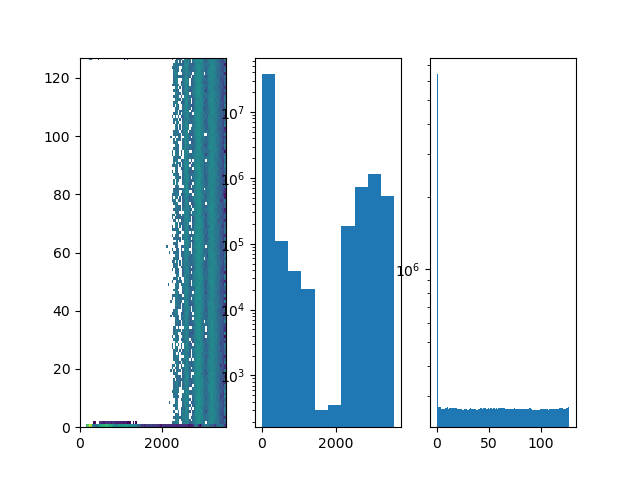

In [118]:
import matplotlib as mpl
f,axes=plt.subplots(1,3)
axes[0].hist2d(st.rdhBC,st.deltaOrbit,norm=mpl.colors.LogNorm(),bins=(100,128))
axes[1].hist(st.rdhBC)
axes[1].set_yscale("log")
axes[2].hist(st.deltaOrbit,bins=128)
axes[2].set_yscale("log")

In [119]:
st[st.deltaOrbit>2].describe()

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
count,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07
mean,3.447811e+02,6.527639e+02,3.828696e-01,1.014927e+04,3.495094e+05,7.998647e+06,7.998712e+06,2.221569e+02,6.496757e+01,7.810490e+06
std,4.958662e+01,5.330394e+02,4.860869e-01,1.768537e+03,3.492940e+05,4.748973e+06,4.748973e+06,7.776671e+02,3.610509e+01,4.748973e+06
min,3.010000e+02,1.000000e+00,0.000000e+00,8.280000e+03,0.000000e+00,1.929580e+05,1.929610e+05,0.000000e+00,3.000000e+00,4.739000e+03
25%,3.010000e+02,1.090000e+02,0.000000e+00,8.497000e+03,3.000000e+00,1.216958e+06,1.217025e+06,0.000000e+00,3.400000e+01,1.028803e+06
50%,3.020000e+02,2.330000e+02,0.000000e+00,9.585000e+03,2.621450e+05,1.039776e+07,1.039787e+07,0.000000e+00,6.500000e+01,1.020964e+07
75%,4.010000e+02,1.196000e+03,1.000000e+00,1.249300e+04,6.541530e+05,1.149677e+07,1.149678e+07,0.000000e+00,9.600000e+01,1.130855e+07
max,9.130000e+02,1.360000e+03,1.000000e+00,2.807500e+04,1.048575e+06,1.255507e+07,1.255520e+07,3.563000e+03,1.270000e+02,1.236698e+07


In [73]:
((st[one_chip].firstTForbit - firstOrbitOfTheRun) / 128)[:3]

Series([], Name: firstTForbit, dtype: float64)

In [74]:
NOF_BC_PER_ORBIT = 3564
ROLL_OVER = 1<<20
 
def sampa_bc_from_global_bc(bc):
    orbitRef=firstOrbitOfTheRun
    bcRef=0
    globalBcRef = orbitRef*NOF_BC_PER_ORBIT + bcRef
    bx = np.subtract(bc,globalBcRef)
    return np.where(bx<ROLL_OVER,bx,bx%ROLL_OVER)

In [76]:
sampaId=22774
ntimeframes=30
norbits=(ntimeframes+1)*128
firstSampaOrbit=st[st.sampaId==sampaId][:1].rdhOrbit.values[0]
firstSampaOrbit

1084635839

In [77]:
orbits=np.arange(firstSampaOrbit,firstSampaOrbit+norbits)
bc=np.multiply(orbits,NOF_BC_PER_ORBIT)
sampa_bc=sampa_bc_from_global_bc(bc)
ix=np.arange(0,len(st))*127*160
ix[:4]

array([    0, 20320, 40640, 60960])

In [78]:
def plot_random_bcs(bc,ax,n):
    for i in range(1,n):
        r=np.random.choice(bc)
        x=(r,r+128*NOF_BC_PER_ORBIT)
        y=sampa_bc_from_global_bc(x)
        s=ax.scatter(x,y)
        xl=(x[0],x[0],x[1],x[1])
        yl=(y[0],0,0,y[1])
        ax.plot(xl,yl,color=s.get_facecolor(),linestyle="dotted")

In [79]:
def plot_timeframe_limits(bc,ax):
    orbits=bc/NOF_BC_PER_ORBIT
    for orbit in range(1,len(orbits),128):
        bc = orbits[orbit]*NOF_BC_PER_ORBIT
        ax.axvline(x=bc,color="red" if orbit==1 else "grey",alpha=0.5)
        

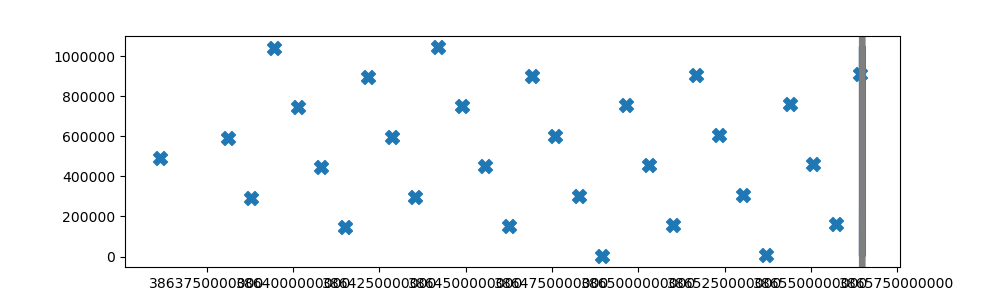

In [80]:
%matplotlib widget
from matplotlib.ticker import FormatStrFormatter
f,ax=plt.subplots(1,1,figsize=(10,3))
ax.plot(bc,sampa_bc)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#plot_random_bcs(bc,ax,5)
plot_timeframe_limits(bc,ax)

sone=st[st.sampaId==sampaId][:ntimeframes-1]
spx=(sone.rdhOrbit-ix[:ntimeframes-1])*NOF_BC_PER_ORBIT
spy=sampa_bc_from_global_bc(spx)

ax.scatter(spx,spy,s=100,marker="X")
